<a href="https://colab.research.google.com/github/AmalBinkhalfoon/DataScience/blob/main/Activity3_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [2]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [5]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [6]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [7]:
pollution_data = merged_data[['pm10','neighborhood']]

In [8]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [9]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [10]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [11]:
pollution_data['pm10'].min()

0.0

In [12]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [13]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [14]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [15]:
joined_table = joined_table.where('pm10', are.below(300))

In [16]:
len(joined_table)

2

In [17]:
joined_table.num_rows

117356

Mean PM10 value (sample): 15.9905913933


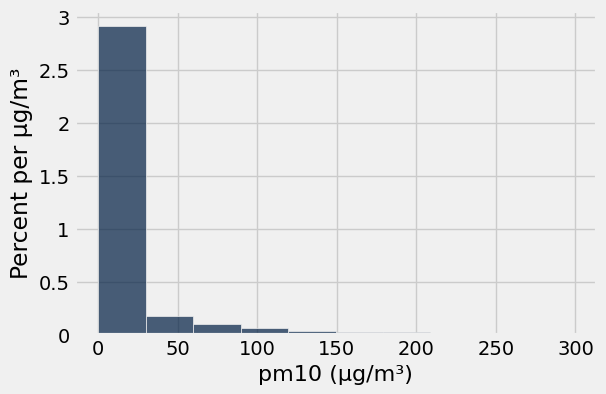

In [18]:
#Randomly sample 10% of the rows without replacement
sample_table = joined_table.sample(int(joined_table.num_rows * 0.1), with_replacement=False)

#Compute the mean pm10 value for the sample
sample_pm10_mean = sample_table.column('pm10').mean()
print("Mean PM10 value (sample):", sample_pm10_mean)

#Create an empirical histogram of the pm10 values from the sample
sample_table.hist('pm10', bins=10, unit='μg/m³', normed=True)

The sample should roughly resemble the full distribution but with more variation and possibly missing some subtle patterns (small peaks or dips).

If the sample is random, it still provides a good approximation of the population shape, especially for larger datasets.

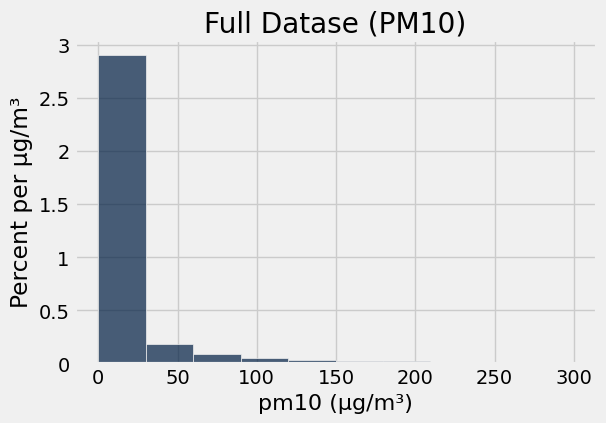

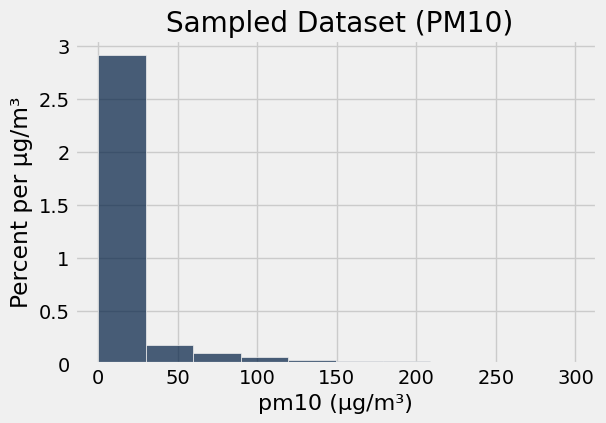

In [19]:
#Overlayed histograms: sample vs full dataset
joined_table.hist('pm10', bins=10, unit='μg/m³', normed=True, overlay=True)
plt.title('Full Datase (PM10)')

sample_table.hist('pm10', bins=10, unit='μg/m³', normed=True, overlay=True)
plt.title(' Sampled Dataset (PM10)')

plt.show()

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [90]:
#Generate 5000 bootstrap samples and compute the median for each
def bootstrap_median(original_table, column_label, num_samples=5000):
    medians = []
    for _ in range(num_samples):
        resample = original_table.sample(with_replacement=True)
        median = percentile(50, resample.column(column_label))
        medians.append(median)
    return np.array(medians)

# Run bootstrap
boot_medians = bootstrap_median(joined_table, 'pm10', num_samples=5000)

#Print the estimated median
etimated_median = np.median(boot_medians)
print('Estimated Median pm10 value:' , etimated_median)
#Construct 95% confidence interval
lower_bound = percentile(2.5, boot_medians)
upper_bound = percentile(97.5, boot_medians)
print('95% Confidence Interval for PM10 Median: [', round(lower_bound, 2), ',', round(upper_bound, 2), ']')

Estimated Median pm10 value: 3.14
95% Confidence Interval for PM10 Median: [ 3.1 , 3.19 ]


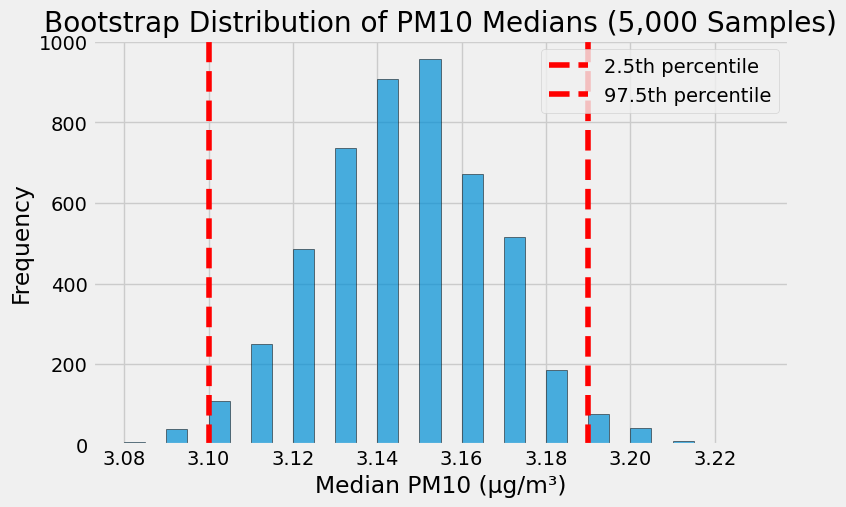

95% Confidence Interval for PM10 Median: [ 3.1 , 3.19 ]

We are 95% confident that the true median PM10 concentration in the population lies between 3.1 , 3.19
This means that, based on the data, the middle level of air pollution (PM10) likely falls within this range.

If the upper bound is above safe levels defined by the WHO (e.g., 15 μg/m³ daily average),
then air quality may pose health risks to the population, especially those with respiratory conditions.


In [91]:
#Draw histogram of bootstrapped medians
plt.figure(figsize=(8, 5))
plt.hist(boot_medians, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5th percentile')
plt.axvline(upper_bound, color='red', linestyle='--', label='97.5th percentile')
plt.title('Bootstrap Distribution of PM10 Medians (5,000 Samples)')
plt.xlabel('Median PM10 (μg/m³)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

print('95% Confidence Interval for PM10 Median: [', round(lower_bound, 2), ',', round(upper_bound, 2), ']\n')
print("We are 95% confident that the true median PM10 concentration in the population lies between", round(lower_bound, 2), ',', round(upper_bound, 2))
print("This means that, based on the data, the middle level of air pollution (PM10) likely falls within this range.\n")
print("If the upper bound is above safe levels defined by the WHO (e.g., 15 μg/m³ daily average),")
print("then air quality may pose health risks to the population, especially those with respiratory conditions.")

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [86]:
#Theoretical Confidence Interval (Normal Approximation)

import scipy.stats as stats

# Sample mean and standard deviation
sample_mean = np.mean(joined_table.column('pm10'))
sample_std = np.std(joined_table.column('pm10'), ddof=1)
sample_size = joined_table.num_rows

# Standard error
standard_error = sample_std / np.sqrt(sample_size)

# Critical z-value for 95% confidence
z_critical = stats.norm.ppf(0.975)  # 2.5% in each tail

# Confidence interval
lower_theory = sample_mean - z_critical * standard_error
upper_theory = sample_mean + z_critical * standard_error

print(f"Theoretical 95% CI for PM10 Mean: [{lower_theory:.2f}, {upper_theory:.2f}]")

Theoretical 95% CI for PM10 Mean: [15.96, 16.38]


In [82]:
#Bootstrap Confidence Interval (Empirical)

#Bootstrap sampling for the mean pm10 value
def bootstrap_mean(original_table, column_label, num_samples=5000):
    means = []
    for i in range(num_samples):
        resample = original_table.sample(with_replacement=True)
        mean = np.mean(resample.column(column_label))
        means.append(mean)
    return np.array(means)

#Run bootstrap
boot_means = bootstrap_mean(joined_table, 'pm10', num_samples=5000)

#Construct 95% confidence interval
lower_bound = percentile(2.5, boot_means)
upper_bound = percentile(97.5, boot_means)

print('95% Confidence Interval for PM10 Mean: [', round(lower_bound, 2), ',', round(upper_bound, 2), ']')

# Hypothesis test based on whether 20 μg/m³ lies within the interval
if 20 >= lower_bound and 20 <= upper_bound:
    print("Fail to reject the null hypothesis: 20 μg/m³ is within the confidence interval.")
    print("There is no statistically significant evidence that the average PM10 level differs from 20 μg/m³.")
else:
    print("Reject the null hypothesis: 20 μg/m³ is not within the confidence interval.")
    print("There is statistically significant evidence that the average PM10 level differs from 20 μg/m³.")


95% Confidence Interval for PM10 Mean: [ 15.96 , 16.38 ]
Reject the null hypothesis: 20 μg/m³ is not within the confidence interval.
There is statistically significant evidence that the average PM10 level differs from 20 μg/m³.


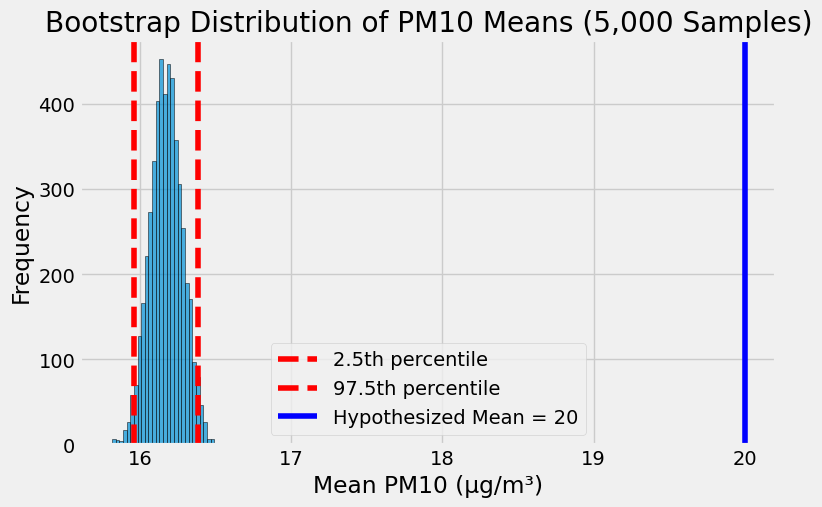

In [84]:
# Plot histogram of bootstrap means
plt.figure(figsize=(8,5))
plt.hist(boot_means, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5th percentile')
plt.axvline(upper_bound, color='red', linestyle='--', label='97.5th percentile')
plt.axvline(20, color='blue', linestyle='-', label='Hypothesized Mean = 20')
plt.title('Bootstrap Distribution of PM10 Means (5,000 Samples)')
plt.xlabel('Mean PM10 (μg/m³)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


Top 3 neighborhoods with highest mean PM10 levels:
neighborhood | pm10 mean
Crotona Park | 53.4512
Pelham Bay   | 34.6071
Tremont      | 29.829


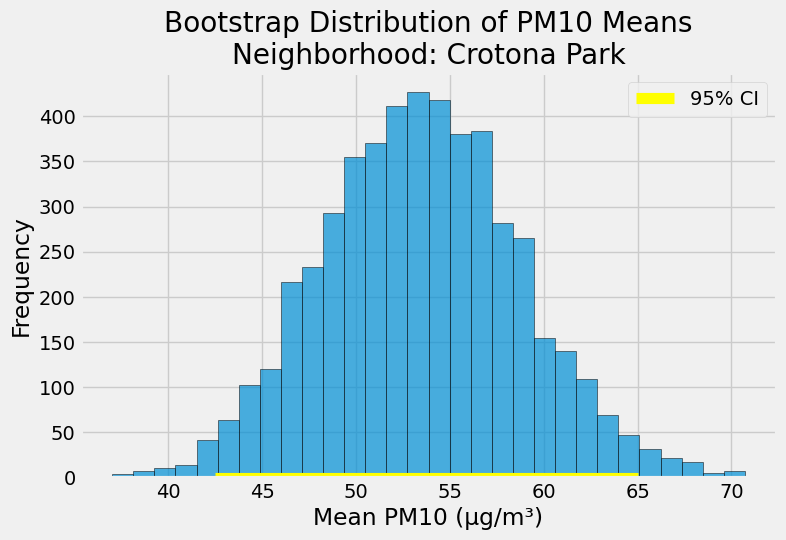

95% Confidence Interval for Crotona Park: [43.52, 64.03]


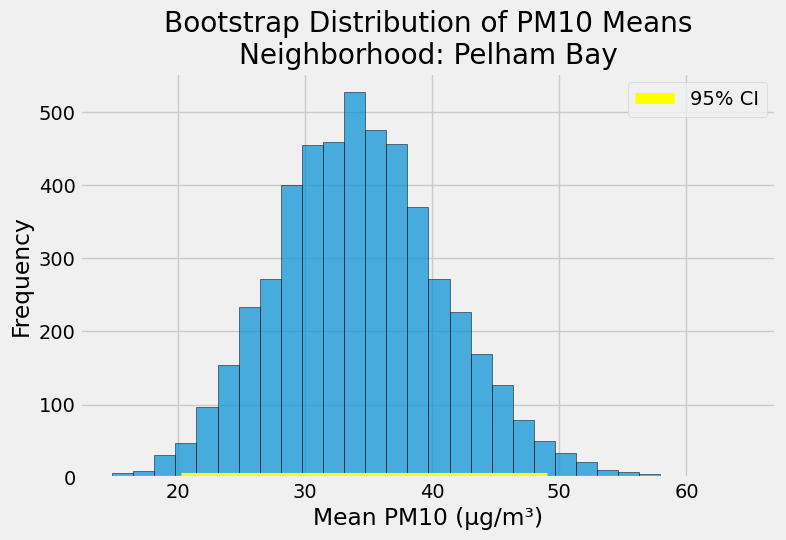

95% Confidence Interval for Pelham Bay: [22.04, 48.19]


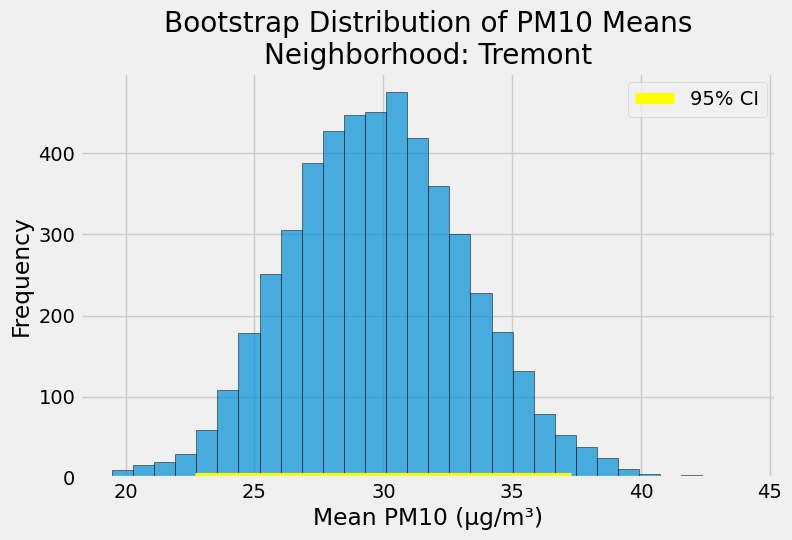

95% Confidence Interval for Tremont: [23.52, 36.77]


In [89]:
#Group by 'neighborhood' and compute the mean PM10
neighborhood_means = joined_table.group('neighborhood', np.mean)

#Sort by PM10 mean descending and pick the top 3
top3_neighborhoods = neighborhood_means.sort('pm10 mean', descending=True).take(np.arange(3))
top3_names = top3_neighborhoods.column('neighborhood')


print("Top 3 neighborhoods with highest mean PM10 levels:")
print(top3_neighborhoods)

#Define bootstrap function for a single neighborhood
def bootstrap_neighborhood_mean(original_table, neighborhood, column_label, num_samples=5000):
    subset = original_table.where('neighborhood', neighborhood)
    means = []
    for _ in range(num_samples):
        resample = subset.sample(with_replacement=True)
        mean = np.mean(resample.column(column_label))
        means.append(mean)
    return np.array(means)

#Perform bootstrapping and plotting for each top neighborhood
for neighborhood in top3_names:
    boot_means = bootstrap_neighborhood_mean(joined_table, neighborhood, 'pm10', num_samples=5000)

    # 95% Confidence Interval
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)

    # Plot histogram
    plt.figure(figsize=(8,5))
    plt.hist(boot_means, bins=30, edgecolor='black', alpha=0.7)
    plt.axhline(y=0, xmin=(lower_bound - min(boot_means))/(max(boot_means)-min(boot_means)),
                xmax=(upper_bound - min(boot_means))/(max(boot_means)-min(boot_means)),
                color='yellow', linewidth=8, label='95% CI')

    # Add labels and title
    plt.title(f'Bootstrap Distribution of PM10 Means\nNeighborhood: {neighborhood}')
    plt.xlabel('Mean PM10 (μg/m³)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print CI
    print(f"95% Confidence Interval for {neighborhood}: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.